In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

os.environ['PYTHONHASHSEED'] = '0'

np.random.seed(12345)


#session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

#from keras import backend as K

#tf.set_random_seed(0)

#sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
#K.set_session(sess)


/Users/daichisato/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from keras import backend as K
K.set_learning_phase(0)

Using TensorFlow backend.


In [3]:
import pandas as pd
# それぞれの画像について腫瘍情報のテーブルを作る
#UT007に関してはもう一度みる必要あり
pic_info = pd.DataFrame({
                    'patient_id' :        ['UT001', 'UT001', 'UT001', 'UT010', 'UT010', 'UT010',  'UT010', 'UT003', 'UT003', 'UT003', 'UT007', 'UT007', 'UT007', 'UT008', 'UT008', 'UT008', 'UT009', 'UT009', 'UT009','UT011','UT011','UT011'],
                    'patient_sub_height': [  '100',   '200',   '300',   '900',  '1000',  '1100',   '1200',  '1300',  '1400',  '1500',   '700',   '800',   '900',   '600',   '700',   '800',  '1500',  '1600',  '1700',  '600',  '700',  '800'],
                    'patient_sub_speed':  [ '1480',  '1480',  '1480',  '1510',  '1510',  '1510',   '1510',  '1480',  '1480',  '1480',  '1523',  '1523',  '1523',  '1521',  '1521',  '1521',  '1518',  '1518',  '1518', '1523', '1523', '1523'],
                    'tumor_left_x' :      [    195,     201,     198,     310,     310,     310,     310,      295,     290,    290,      180,     200,     195,     200,     200,     200,     132,     132,     127,    170,   175,     172],
                    'tumor_upper_y' :     [    205,     208,     200,     225,     225,     225,     230,      300,     298,    300,      230,     250,     240,     220,     220,     220,     270,     270,     270,    245,   250,     253],
                    'tumor_width' :       [     50,      50,      50,      70,      50,      45,      45,       50,      50,     50,       80,      60,      70,      70,      70,      70,      50,      50,      50,     55,    55,      45],
                    'tumor_height' :      [     45,      45,      45,      45,      70,      50,      50,       35,      30,     40,       80,      60,      70,      40,      40,      40,      55,      55,      55,     55,    55,      45],
                    'default_left_x' :    [    100,     100,     100,     150,    150,      150,     150,      100,     100,    100,      100,     100,     100,     100,     100,     100,     100,     100,      100,    100,   100,    100],
                    'default_upper_y' :   [    100,     100,     100,     100,    100,      100,     100,      100,     100,    100,      200,     200,     200,     100,     100,     100,     100,     100,      100,    100,   100,    100],
                    'max_left_x' :        [    340,     340,     340,     340,    340,      340,     340,      340,     340,    340,      220,     220,     220,     340,     340,     340,     340,     340,      340,    250,   250,    250],
                    'max_upper_y' :       [    340,     340,     340,     340,    340,      340,     340,      340,     340,    340,      280,     280,     280,     240,     340,     340,     340,     340,      340,    300,   300,    300],
                    'file_path' : ['./data/all_data/tumor/P_UT001_20161226_153444_100_speed1480_GCF010_comp8.bmp',
                                   './data/all_data/tumor/P_UT001_20161226_153500_200_speed1480_GCF010_comp8.bmp',
                                   './data/all_data/tumor/P_UT001_20161226_153514_300_speed1480_GCF010_comp8.bmp',
                                   './data/all_data/tumor/N_UT010_20170428_141903_900_speed1510_GCF10_comp8_max02.bmp',
                                   './data/all_data/tumor/N_UT010_20170428_141918_1000_speed1510_GCF10_comp8_max02.bmp',
                                   './data/all_data/tumor/N_UT010_20170428_141932_1100_speed1510_GCF10_comp8_max02.bmp',
                                   './data/all_data/tumor/N_UT010_20170428_141946_1200_speed1510_GCF10_comp8_max02.bmp',
                                   './data/all_data/tumor/UT003_20170120_155150_1300_speed1480_GCF10_comp8.bmp',
                                   './data/all_data/tumor/UT003_20170120_155205_1400_speed1480_GCF10_comp8.bmp',
                                   './data/all_data/tumor/UT003_20170120_155219_1500_speed1480_GCF10_comp8.bmp',
                                   './data/all_data/tumor/UT007_20170303_120722_700_speed1523.985_gcf10_comp8_1490_binarySpeed.bmp',
                                   './data/all_data/tumor/UT007_20170303_120736_800_speed1523.985_gcf10_comp8_1490_binarySpeed.bmp',
                                   './data/all_data/tumor/UT007_20170303_120750_900_speed1523.985_gcf10_comp8_1490_binarySpeed.bmp',
                                   './data/all_data/tumor/N_UT_008_20170407_144338_600_speed1521.935_gcf10_comp8_1400_binarySpeed.bmp',
                                   './data/all_data/tumor/N_UT_008_20170407_144352_700_speed1521.935_gcf10_comp8_1400_binarySpeed.bmp',
                                   './data/all_data/tumor/N_UT_008_20170407_144407_800_speed1521.935_gcf10_comp8_1400_binarySpeed.bmp',
                                   './data/all_data/tumor/UT009_20170421_135409_1500_speed1518.414_gcf10_comp8_1395_binarySpeed.bmp',
                                   './data/all_data/tumor/UT009_20170421_135424_1600_speed1518.414_gcf10_comp8_1395_binarySpeed.bmp',
                                   './data/all_data/tumor/UT009_20170421_135438_1700_speed1518.414_gcf10_comp8_1395_binarySpeed.bmp',
                                   './data/all_data/tumor/UT011_20170512_141428_600_speed1523.434_gcf10_comp8_1460_binarySpeed.bmp',
                                   './data/all_data/tumor/UT011_20170512_141441_700_speed1523.434_gcf10_comp8_1460_binarySpeed.bmp',
                                   './data/all_data/tumor/UT011_20170512_141455_800_speed1523.434_gcf10_comp8_1460_binarySpeed.bmp',]
                    }, index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])

In [4]:
from patch_func import patch

x_y_label = patch(pic_info, 100, 100, 10)

ModuleNotFoundError: No module named 'patch_func'

In [5]:
from keras.initializers import glorot_uniform, he_normal
from keras.models import Sequential
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.layers.core import Dense, Dropout, Activation, Flatten

def cnn_model (n_filter, n_filter2, n_filter3, size_filter, size_filter1, n_hidden, n_label, X_train):
    
    kernel_init = he_normal()
    
    
    model = Sequential()

    model.add(Conv2D(n_filter,(size_filter1, size_filter1), padding='same',kernel_initializer = kernel_init,
                     input_shape=X_train.shape[1:], activation = 'relu'))
    model.add(Conv2D(n_filter, (size_filter1, size_filter1), padding='same',kernel_initializer = kernel_init, activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(size_pool, size_pool)))
    model.add(Dropout(0.25, seed=12345))

    
    model.add(Conv2D(n_filter2, (size_filter, size_filter), padding='same',kernel_initializer = kernel_init, activation = 'relu'))
    model.add(Conv2D(n_filter2, (size_filter, size_filter), padding='same',kernel_initializer = kernel_init, activation = 'relu'))
    #model.add(Conv2D(n_filter2, (size_filter, size_filter), padding='same',kernel_initializer = kernel_init, activation = 'relu'))
    #model.add(Conv2D(n_filter2, (size_filter, size_filter), padding='same',kernel_initializer = kernel_init, activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(size_pool, size_pool)))
    model.add(Dropout(0.25, seed=12345))

    model.add(Conv2D(n_filter3, (size_filter, size_filter), padding='same',kernel_initializer = kernel_init, activation = 'relu'))
    model.add(Conv2D(n_filter3, (size_filter, size_filter), padding='same',kernel_initializer = kernel_init, activation = 'relu'))
    #model.add(Conv2D(n_filter3, (size_filter, size_filter), padding='same',kernel_initializer = kernel_init, activation = 'relu'))
    #model.add(Conv2D(n_filter3, (size_filter, size_filter), padding='same',kernel_initializer = kernel_init, activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(size_pool, size_pool)))
    
    model.add(Flatten())
    model.add(Dense(n_hidden, kernel_initializer = kernel_init))
    model.add(Activation('relu'))
    model.add(Dropout(0.5, seed=12345))
    model.add(Dense(n_label, kernel_initializer = he_normal(seed=12345)))      # クラスは2個
    model.add(Activation('sigmoid'))
    
    return model 

In [6]:
import keras
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report

def keras_cnn_fit(loss, optimizer, batch, epoch, Y_test, x_test, y_test, val_x_train, val_y_train, val_x_test, val_y_test):
    
    x_test = x_test
    Y_test = Y_test
    
    model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=['accuracy'])

    #　Tensor Boardのcallbackを作成
    from keras.callbacks import TensorBoard
    tbcb = TensorBoard(log_dir = './graph',
                     histogram_freq = 0, write_graph = True)

    # historyに学習履歴を取得
    es_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')

    history = model.fit(val_x_train, val_y_train, batch_size=batch, epochs=epoch,
                       validation_data = (val_x_test, val_y_test), verbose=1,
                       callbacks = [tbcb])


    # モデルの保存
    #from keras.models import model_from_json
    #model_json=model.to_json()
    #with open("model.json",mode='w') as f:
    #    f.write(model_json)
    
    # 学習済みの重みを保存
    #model.save_weights("weights.hdf5")

    # 学習履歴を保存
    #import pickle
    #with open("history.pickle",mode='wb') as f:
    #    pickle.dump(history.history,f)
    
    score = model.evaluate(x_test, y_test, verbose=0)

    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    #Accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    #loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    classes = model.predict_classes(x_test)

    confmat = confusion_matrix(y_true=Y_test, y_pred=classes)
    test_seikai_label = (np.argmax(y_test,axis = 1) ).reshape(-1,1)
    print(confmat)
    print('accuracy : ', accuracy_score(Y_test, classes))
    print('recall: ', recall_score(Y_test, classes))

    return test_seikai_label, x_test, Y_test, classes

In [10]:
#モデルのパラメータ
n_filter = 32
n_filter2 = 64
n_filter3 = 128

size_filter1 = 3
size_filter = 3
size_pool = 2

n_hidden = 512
n_label = 2

#コンパイル時のパラメータ
loss='binary_crossentropy'
optimizer = "Adam"
batch = 64
epoch = 5

from data_making import mk_data
Y_test, X_train, x_test, y_test, val_x_train, val_y_train, val_x_test, val_y_test = mk_data(x_y_label,"UT001")

model = cnn_model (n_filter, n_filter2, n_filter3, size_filter, size_filter1,   n_hidden, n_label, X_train)
print('model')
print(model.summary())


model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)        0         
____

Train on 498 samples, validate on 498 samples
Epoch 1/5
498/498 [==============================] - 92s 185ms/step - loss: 1.0043 - acc: 0.5231 - val_loss: 0.7042 - val_acc: 0.4980
Epoch 2/5
498/498 [==============================] - 97s 195ms/step - loss: 0.6526 - acc: 0.6155 - val_loss: 0.5470 - val_acc: 0.7339
Epoch 3/5
498/498 [==============================] - 95s 191ms/step - loss: 0.5573 - acc: 0.6998 - val_loss: 0.5209 - val_acc: 0.7510
Epoch 4/5
498/498 [==============================] - 94s 188ms/step - loss: 0.5204 - acc: 0.7510 - val_loss: 0.4758 - val_acc: 0.7741
Epoch 5/5
498/498 [==============================] - 106s 214ms/step - loss: 0.4730 - acc: 0.7721 - val_loss: 0.4351 - val_acc: 0.8052
Test loss: 0.45655955461894765
Test accuracy: 0.7852941162445966


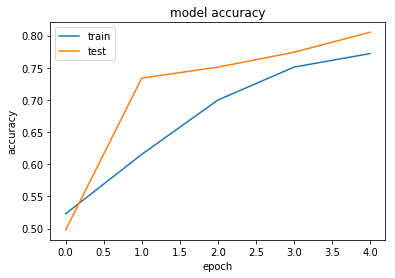

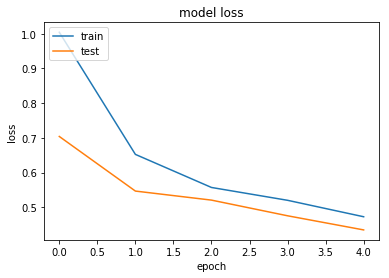

[[66 19]
 [17 68]]
accuracy :  0.788235294117647
recall:  0.8


In [11]:
test_seikai_label, x_test, Y_test, classes = keras_cnn_fit(loss, optimizer, batch, epoch, Y_test, x_test, y_test, val_x_train, val_y_train, val_x_test, val_y_test)

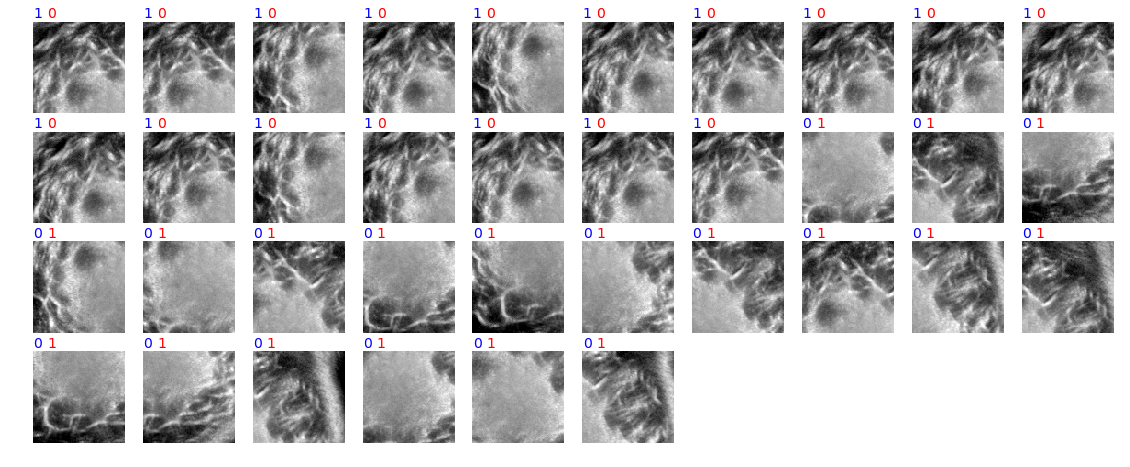

In [12]:
from misclassification import check_misclassification_image

check_misclassification_image(test_seikai_label, x_test, Y_test, classes)

/Users/daichisato/Documents/Lilly/Lilly_medtech/layer_visualization.py:45: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


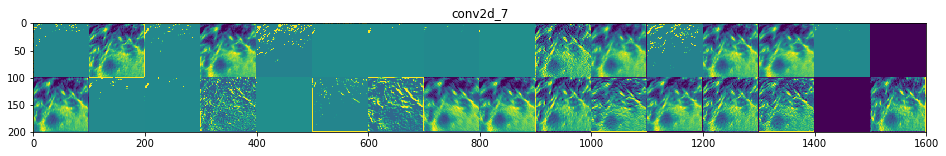

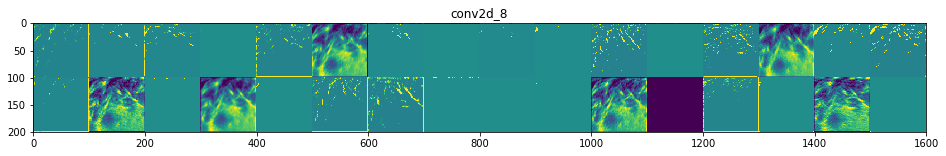

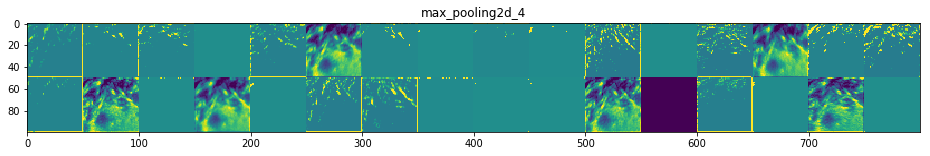

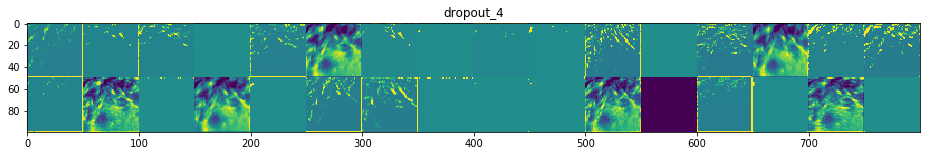

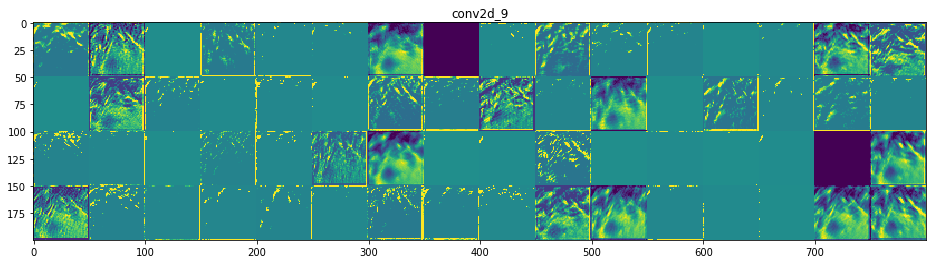

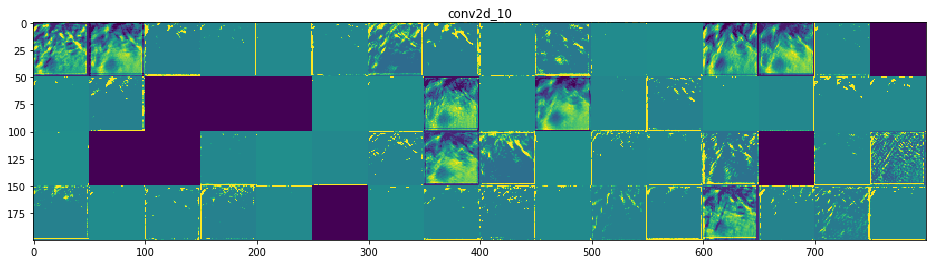

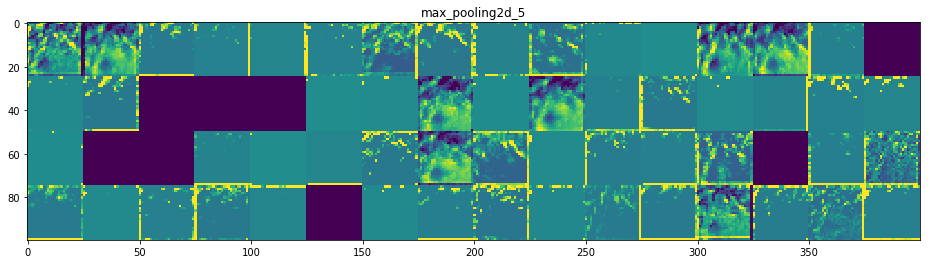

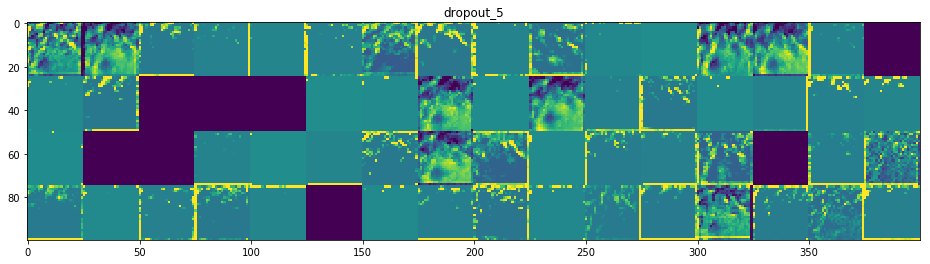

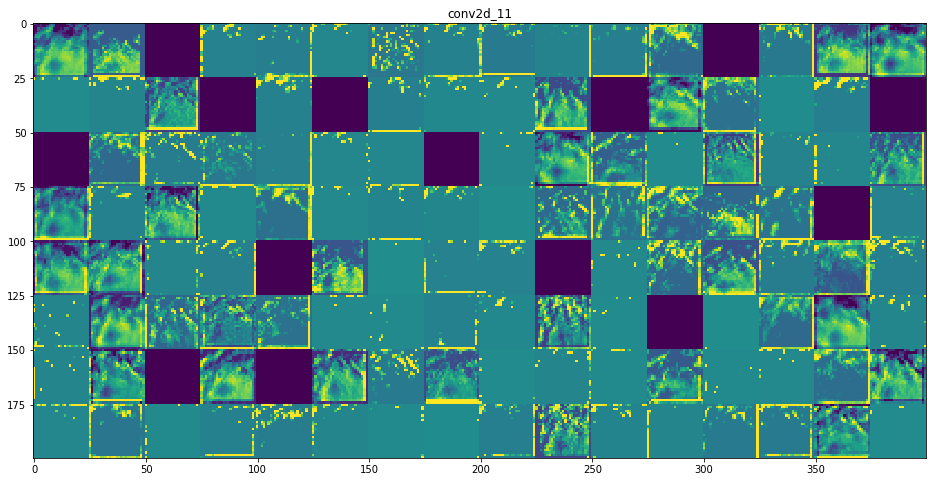

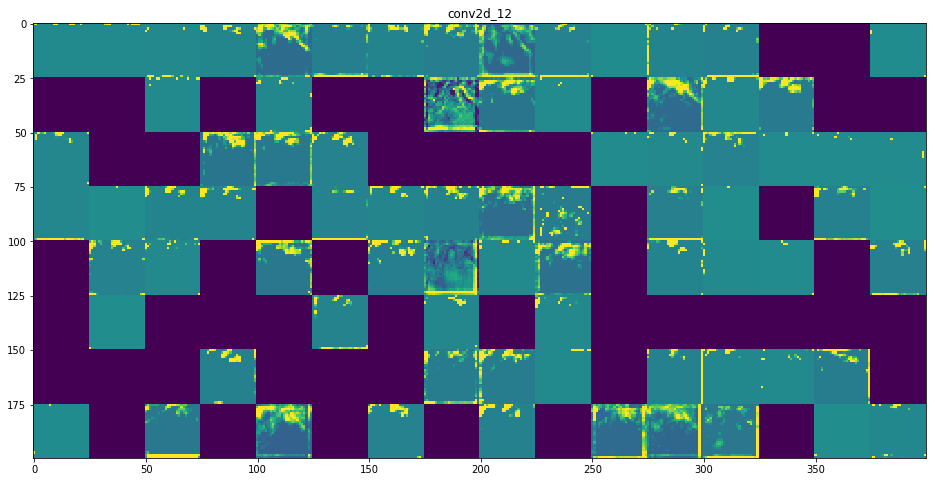

In [13]:
from layer_visualization import layer_vis
select_img = layer_vis(model, x_test, 10, 16, 50)

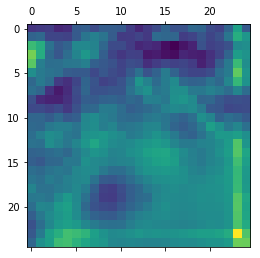

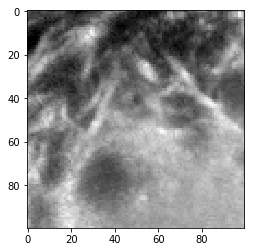

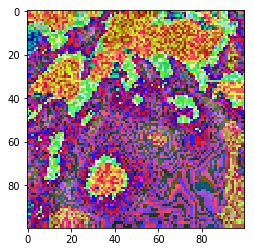

In [14]:
from layer_heatmap import layer_heatmap
layer_heatmap(model, select_img, "conv2d_11", 64)